In [1]:
import numpy as np
from tensorflow.keras import layers,models,optimizers
from tensorflow.keras.models import save_model
import matplotlib.pyplot as plt
from tqdm import tqdm

from datetime import datetime

In [2]:
from os import chdir
chdir("../")   # only run this ones else error will occur

In [3]:
X_train_n = np.load('private/npy/X_train_noise.npy')
X_test_n = np.load('private/npy/X_test_noise.npy')
y_train_n = np.load('private/npy/y_train_noise.npy')
y_test_n = np.load('private/npy/y_test_noise.npy')

In [4]:
def train_model_with_learning_rate(learning_rate,epoch=1):
    model_noise = models.Sequential()

    model_noise.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 130, 1)))
    model_noise.add(layers.MaxPooling2D((2, 2)))

    model_noise.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model_noise.add(layers.MaxPooling2D((2, 2)))

    model_noise.add(layers.Flatten())
    model_noise.add(layers.Dense(64, activation='relu'))
    model_noise.add(layers.Dense(1, activation='sigmoid'))

    model_noise.compile(optimizer=optimizers.legacy.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    history = model_noise.fit(X_train_n, y_train_n, epochs=epoch, validation_data=(X_test_n, y_test_n), batch_size=64)
    
    return history.history['val_accuracy'][-1]



In [11]:
num_lambdas = 10
min_lambda = -4.6  
max_lambda = -4.4  

# Generate random learning rates in log space
random_lambdas = np.random.uniform(min_lambda, max_lambda, num_lambdas)

learning_rates = np.sort(np.power(10, random_lambdas))


In [12]:
max_accuracy = 0
best_lambda = None

validation_accuracies = []
for lr in tqdm(learning_rates, desc="Training models", unit="model"):
    val_acc = train_model_with_learning_rate(lr,3)
    validation_accuracies.append(val_acc)

    if val_acc > max_accuracy:
        max_accuracy = val_acc
        best_lambda = lr


Training models:   0%|          | 0/10 [00:00<?, ?model/s]

Epoch 1/3
168/168 [==============================] - 40s 233ms/step - loss: 0.3932 - accuracy: 0.9468 - val_loss: 0.0431 - val_accuracy: 0.9862
Epoch 2/3
168/168 [==============================] - 38s 228ms/step - loss: 0.0331 - accuracy: 0.9882 - val_loss: 0.0209 - val_accuracy: 0.9925
Epoch 3/3
168/168 [==============================] - 40s 241ms/step - loss: 0.0348 - accuracy: 0.9888 - val_loss: 0.0402 - val_accuracy: 0.9877


Training models:  10%|█         | 1/10 [02:00<18:02, 120.24s/model]

Epoch 1/3
168/168 [==============================] - 41s 242ms/step - loss: 1.1949 - accuracy: 0.9195 - val_loss: 0.0801 - val_accuracy: 0.9862
Epoch 2/3
168/168 [==============================] - 42s 247ms/step - loss: 0.0482 - accuracy: 0.9862 - val_loss: 0.0335 - val_accuracy: 0.9888
Epoch 3/3
168/168 [==============================] - 43s 255ms/step - loss: 0.0310 - accuracy: 0.9908 - val_loss: 0.0288 - val_accuracy: 0.9888


Training models:  20%|██        | 2/10 [04:06<16:29, 123.73s/model]

Epoch 1/3
168/168 [==============================] - 44s 251ms/step - loss: 1.0424 - accuracy: 0.9204 - val_loss: 0.0503 - val_accuracy: 0.9910
Epoch 2/3
168/168 [==============================] - 42s 249ms/step - loss: 0.0389 - accuracy: 0.9881 - val_loss: 0.0251 - val_accuracy: 0.9903
Epoch 3/3
168/168 [==============================] - 43s 255ms/step - loss: 0.0278 - accuracy: 0.9915 - val_loss: 0.0282 - val_accuracy: 0.9959


Training models:  30%|███       | 3/10 [06:15<14:42, 126.11s/model]

Epoch 1/3
168/168 [==============================] - 43s 251ms/step - loss: 1.0103 - accuracy: 0.9404 - val_loss: 0.0344 - val_accuracy: 0.9873
Epoch 2/3
168/168 [==============================] - 42s 248ms/step - loss: 0.0352 - accuracy: 0.9897 - val_loss: 0.0367 - val_accuracy: 0.9873
Epoch 3/3
168/168 [==============================] - 42s 250ms/step - loss: 0.1773 - accuracy: 0.9689 - val_loss: 0.0358 - val_accuracy: 0.9884


Training models:  40%|████      | 4/10 [08:22<12:38, 126.46s/model]

Epoch 1/3
168/168 [==============================] - 43s 251ms/step - loss: 1.3213 - accuracy: 0.9169 - val_loss: 0.1228 - val_accuracy: 0.9589
Epoch 2/3
168/168 [==============================] - 44s 259ms/step - loss: 0.1113 - accuracy: 0.9701 - val_loss: 0.0944 - val_accuracy: 0.9757
Epoch 3/3
168/168 [==============================] - 48s 285ms/step - loss: 0.1051 - accuracy: 0.9793 - val_loss: 0.1374 - val_accuracy: 0.9948


Training models:  50%|█████     | 5/10 [10:36<10:46, 129.33s/model]

Epoch 1/3
168/168 [==============================] - 54s 318ms/step - loss: 0.5500 - accuracy: 0.9493 - val_loss: 0.0644 - val_accuracy: 0.9828
Epoch 2/3
168/168 [==============================] - 47s 282ms/step - loss: 0.0332 - accuracy: 0.9880 - val_loss: 0.0252 - val_accuracy: 0.9944
Epoch 3/3
168/168 [==============================] - 52s 312ms/step - loss: 0.0164 - accuracy: 0.9943 - val_loss: 0.0157 - val_accuracy: 0.9955


Training models:  60%|██████    | 6/10 [13:10<09:11, 137.77s/model]

Epoch 1/3
168/168 [==============================] - 51s 301ms/step - loss: 0.2884 - accuracy: 0.9163 - val_loss: 0.1158 - val_accuracy: 0.9586
Epoch 2/3
168/168 [==============================] - 49s 292ms/step - loss: 0.1090 - accuracy: 0.9711 - val_loss: 0.0976 - val_accuracy: 0.9817
Epoch 3/3
168/168 [==============================] - 52s 312ms/step - loss: 0.0954 - accuracy: 0.9836 - val_loss: 0.0867 - val_accuracy: 0.9888


Training models:  70%|███████   | 7/10 [15:44<07:08, 142.83s/model]

Epoch 1/3
168/168 [==============================] - 45s 263ms/step - loss: 1.2368 - accuracy: 0.9404 - val_loss: 0.0349 - val_accuracy: 0.9929
Epoch 2/3
168/168 [==============================] - 46s 271ms/step - loss: 0.0218 - accuracy: 0.9926 - val_loss: 0.0375 - val_accuracy: 0.9888
Epoch 3/3
168/168 [==============================] - 44s 263ms/step - loss: 0.0189 - accuracy: 0.9951 - val_loss: 0.0183 - val_accuracy: 0.9944


Training models:  80%|████████  | 8/10 [17:59<04:40, 140.37s/model]

Epoch 1/3
168/168 [==============================] - 45s 268ms/step - loss: 1.2231 - accuracy: 0.8622 - val_loss: 0.1031 - val_accuracy: 0.9014
Epoch 2/3
168/168 [==============================] - 47s 279ms/step - loss: 0.0979 - accuracy: 0.9121 - val_loss: 0.0850 - val_accuracy: 0.9869
Epoch 3/3
168/168 [==============================] - 44s 259ms/step - loss: 0.0860 - accuracy: 0.9902 - val_loss: 0.0854 - val_accuracy: 0.9869


Training models:  90%|█████████ | 9/10 [20:15<02:19, 139.10s/model]

Epoch 1/3
168/168 [==============================] - 47s 277ms/step - loss: 0.8788 - accuracy: 0.9354 - val_loss: 0.0199 - val_accuracy: 0.9922
Epoch 2/3
168/168 [==============================] - 47s 282ms/step - loss: 0.0416 - accuracy: 0.9877 - val_loss: 0.0154 - val_accuracy: 0.9959
Epoch 3/3
168/168 [==============================] - 50s 295ms/step - loss: 0.0234 - accuracy: 0.9925 - val_loss: 0.0266 - val_accuracy: 0.9922


Training models: 100%|██████████| 10/10 [22:40<00:00, 136.01s/model]


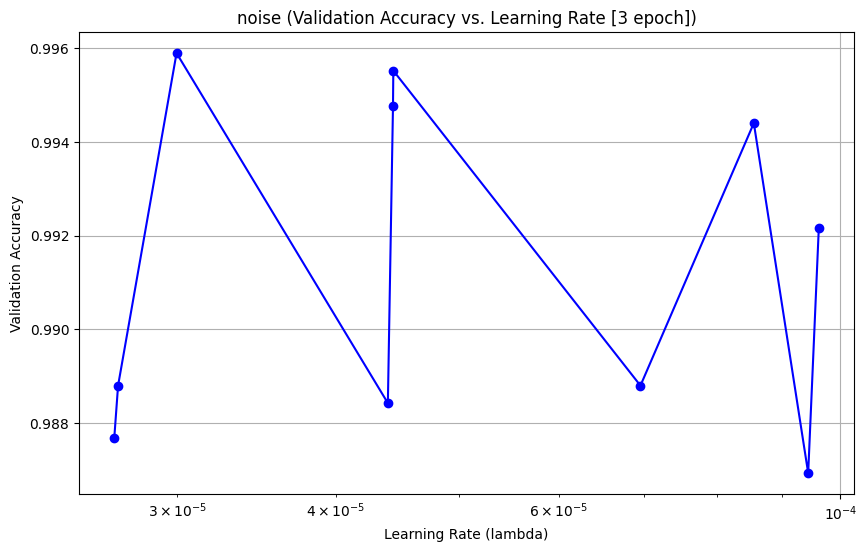

In [13]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, validation_accuracies, 'bo-')
plt.xscale('log')
plt.xlabel('Learning Rate (lambda)')
plt.ylabel('Validation Accuracy')
plt.title('noise (Validation Accuracy vs. Learning Rate [3 epoch])')
plt.grid(True)

# Save graph with timestamp in the filename
current_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
filename = f"testing records/validation_accuracy_{current_time}.png"
plt.savefig(filename)


In [14]:
print("Log of lambda with highest accuracy:", np.log10(best_lambda))

Log of lambda with highest accuracy: -4.523355632627781
